In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from numpy.random import normal
import time

#### Testeo de simulaciones proyecto

In [24]:
#Browniano
def Bt(N, T, K,ty=False):
    step = T/K
    t = list(map(lambda r: r*step,range(0, K+1)))
    B = np.zeros((N, K+1))
    normals = normal(size=(N, K+1))
    for i in range(1, K+1):
        B[:, i] = B[:, i-1] + np.sqrt(step) * normals[:, i]
    if ty:
        return B
    return B[:,-1]

def heat1d(f,x,Bt):
    return np.mean(f(Bt+x))

def heat2d(f,x,y,Bt1,Bt2):
    ef=[]
    for i in range(len(Bt1)):
        ef.append(f(Bt1[i]+x,Bt2[i]+y)) 
    return np.mean(ef)

def ftheat1d(f,X,t,N,h):
    K=np.int32(np.ceil(t/h))
    B=Bt(N,t,K)
    ftx=np.zeros(len(X))
    hx=0
    for x in X:
        ftx[hx]=heat1d(f,x,B)
        hx+=1
    return ftx

def ftheat2d(f,X,Y,t,N,h):
    K=np.int32(np.ceil(t/h))
    B1=Bt(N,t,K)
    B2=Bt(N,t,K)
    ftx=np.zeros([len(X),len(Y)])
    hx=0
    hy=0
    for x in X:
        for y in Y:
            ftx[hx][hy]=heat2d(f,x,y,B1,B2)
            hy+=1
        hy=0
        hx+=1
    return ftx

#Funciones 
def gaussiana1d(x):
    return np.exp(-x**2)

def gaussiana2d(x,y):
    return 100*np.exp(-x**2-y**2)

def funciontest(x):
    return np.cos(x)

def wave(x,y):
    return np.sin(x)*np.sin(y)*np.exp(-x**2-y**2)

def absolutewave(x,y):
    return np.absolute(np.sin(x)*np.sin(y)*np.exp(-x**2-y**2))

def absolute(x):
    return np.absolute(np.cos(x))

def sin1(x):
    return np.absolute(np.sin(x**2))

def topologistsine(x):
    return np.absolute(np.sin(np.absolute(1/x)))

def sincos(x):
    return np.absolute(np.sin(x**2)*np.cos(x))

#### Simulaciones

Condición inicial $f(x) = e^{-x^2}$

<IPython.core.display.Javascript object>


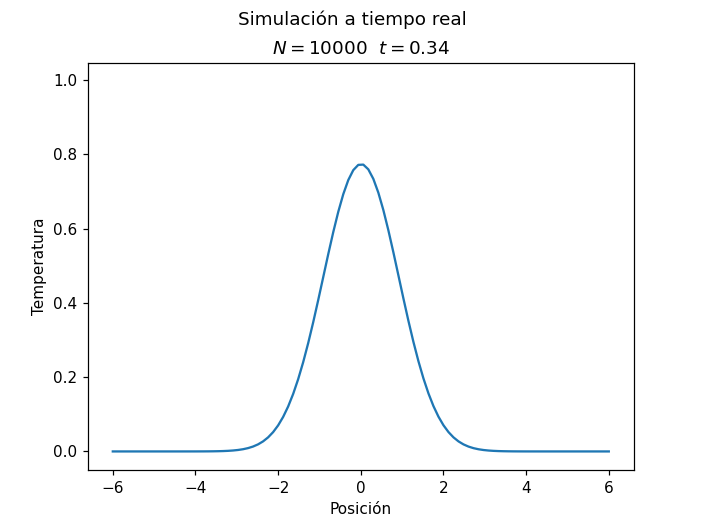

In [4]:
# Setting inicial
# N de Brownianos, tolerancias, y cambios en tiempo
%matplotlib notebook
N=10000
h=0.01
dt=0.01
t=0.001
x = np.linspace(-6, 6, 100)
ground_state = ftheat1d(gaussiana1d,x,t,N,h)
plt.ion()
plt.ion()

#Simulacion en tiempo real
def simulate(*args):
    global ground_state
    global t
    ground_state = ftheat1d(gaussiana1d,x,t,N,h)
    t+=dt

simulate()

fig, ax = plt.subplots()
line1, = ax.plot(x, ground_state)
#plt.rcParams['figure.dpi'] = 300
#im = plt.imshow(ground_state, animated = True,cmap='Greys')
#im.title('W')

def update_fig(*args):
    global ground_state
    simulate(ground_state, 1000, 2.1)
    # updating data values
    line1.set_xdata(x)
    line1.set_ydata(ground_state)
    plt.suptitle('Simulación a tiempo real')
    plt.xlabel("Posición")
    plt.ylabel("Temperatura")
    plt.title(r'$N=$'+str(N)+r'  $t =$'+str("{:.2f}".format(t)))
    return line1

ani = animation.FuncAnimation(fig, update_fig, interval = 0.1,save_count=100)
plt.show();
#ani.save("heat1d.mp4",fps=10)

Condición inicial $f(x) = |cos(x)|$

In [ ]:
# Setting inicial
# N de Brownianos, tolerancias, y cambios en tiempo
%matplotlib notebook
N=10000
h=0.01
dt=0.01
t=0.001
x = np.linspace(-6, 6, 100)
ground_state = ftheat1d(gaussiana1d,x,t,N,h)
plt.ion()
plt.ion()

#Simulacion en tiempo real
def simulate(*args):
    global ground_state
    global t
    ground_state = ftheat1d(absolute,x,t,N,h)
    t+=dt

simulate()

fig, ax = plt.subplots()
line1, = ax.plot(x, ground_state)
#plt.rcParams['figure.dpi'] = 300
#im = plt.imshow(ground_state, animated = True,cmap='Greys')
#im.title('W')

def update_fig(*args):
    global ground_state
    simulate(ground_state, 1000, 2.1)
    # updating data values
    line1.set_xdata(x)
    line1.set_ydata(ground_state)
    plt.suptitle('Simulación a tiempo real')
    plt.xlabel("Posición")
    plt.ylabel("Temperatura")
    plt.title(r'$N=$'+str(N)+r'  $t =$'+str("{:.2f}".format(t)))
    return line1

ani = animation.FuncAnimation(fig, update_fig, interval = 0.1,save_count=100)
plt.show();
#ani.save("heat1d.mp4",fps=10)

Condición inicial $f(x) = $

<IPython.core.display.Javascript object>


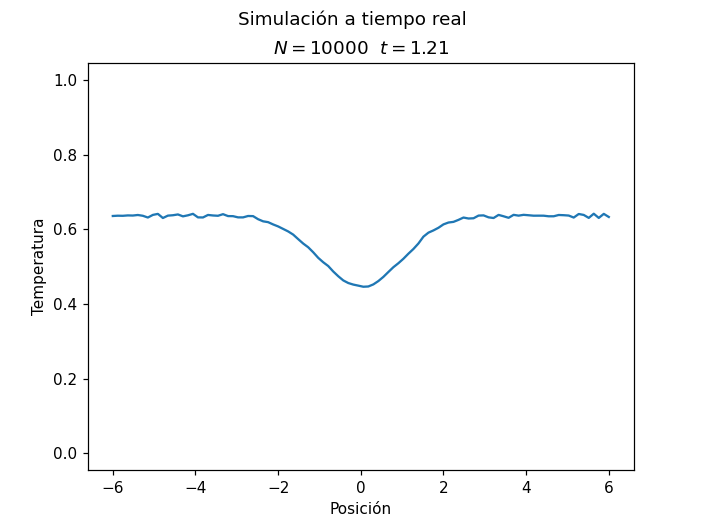

In [21]:
# Setting inicial
# N de Brownianos, tolerancias, y cambios en tiempo
%matplotlib notebook
N=10000
h=0.01
dt=0.01
t=0.001
x = np.linspace(-6, 6, 100)
ground_state = ftheat1d(sin1,x,t,N,h)
plt.ion()
plt.ion()

#Simulacion en tiempo real
def simulate(*args):
    global ground_state
    global t
    ground_state = ftheat1d(sin1,x,t,N,h)
    t+=dt

simulate()

fig, ax = plt.subplots()
line1, = ax.plot(x, ground_state)
#plt.rcParams['figure.dpi'] = 300
#im = plt.imshow(ground_state, animated = True,cmap='Greys')
#im.title('W')

def update_fig(*args):
    global ground_state
    simulate(ground_state, 1000, 2.1)
    # updating data values
    line1.set_xdata(x)
    line1.set_ydata(ground_state)
    plt.suptitle('Simulación a tiempo real')
    plt.xlabel("Posición")
    plt.ylabel("Temperatura")
    plt.title(r'$N=$'+str(N)+r'  $t =$'+str("{:.2f}".format(t)))
    return line1

ani = animation.FuncAnimation(fig, update_fig, interval = 0.1,save_count=100)
plt.show();
#ani.save("heat1d.mp4",fps=10)

<IPython.core.display.Javascript object>


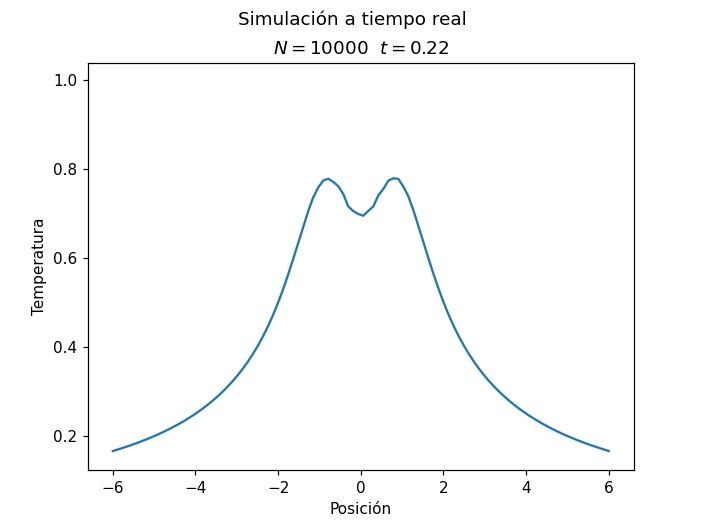

In [29]:
# Setting inicial
# N de Brownianos, tolerancias, y cambios en tiempo
%matplotlib notebook
N=10000
h=0.01
dt=0.01
t=0.001
x = np.linspace(-6, 6, 100)
ground_state = ftheat1d(topologistsine,x,t,N,h)
plt.ion()
plt.ion()

#Simulacion en tiempo real
def simulate(*args):
    global ground_state
    global t
    ground_state = ftheat1d(topologistsine,x,t,N,h)
    t+=dt

simulate()

fig, ax = plt.subplots()
line1, = ax.plot(x, ground_state)
#plt.rcParams['figure.dpi'] = 300
#im = plt.imshow(ground_state, animated = True,cmap='Greys')
#im.title('W')

def update_fig(*args):
    global ground_state
    simulate(ground_state, 1000, 2.1)
    # updating data values
    line1.set_xdata(x)
    line1.set_ydata(ground_state)
    plt.suptitle('Simulación a tiempo real')
    plt.xlabel("Posición")
    plt.ylabel("Temperatura")
    plt.title(r'$N=$'+str(N)+r'  $t =$'+str("{:.2f}".format(t)))
    return line1

ani = animation.FuncAnimation(fig, update_fig, interval = 0.1,save_count=100)
plt.show();
#ani.save("heat1d.mp4",fps=10)

<IPython.core.display.Javascript object>


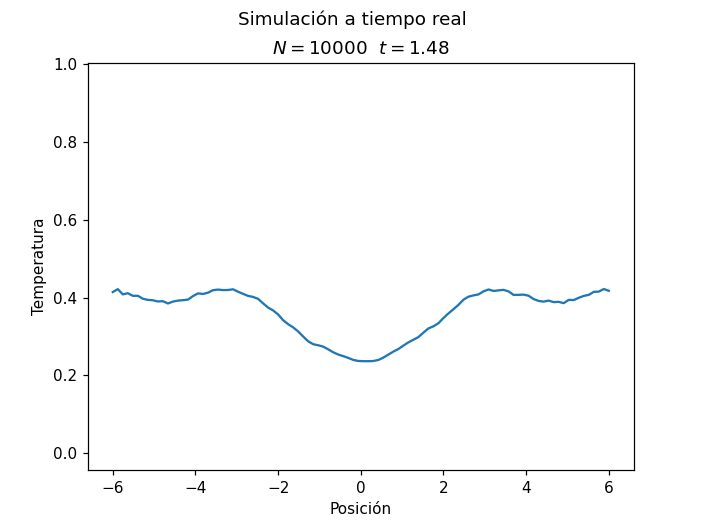

In [28]:
# Setting inicial
# N de Brownianos, tolerancias, y cambios en tiempo
%matplotlib notebook
N=10000
h=0.01
dt=0.01
t=0.001
x = np.linspace(-6, 6, 100)
ground_state = ftheat1d(sincos,x,t,N,h)
plt.ion()
plt.ion()

#Simulacion en tiempo real
def simulate(*args):
    global ground_state
    global t
    ground_state = ftheat1d(sincos,x,t,N,h)
    t+=dt

simulate()

fig, ax = plt.subplots()
line1, = ax.plot(x, ground_state)
#plt.rcParams['figure.dpi'] = 300
#im = plt.imshow(ground_state, animated = True,cmap='Greys')
#im.title('W')

def update_fig(*args):
    global ground_state
    simulate(ground_state, 1000, 2.1)
    # updating data values
    line1.set_xdata(x)
    line1.set_ydata(ground_state)
    plt.suptitle('Simulación a tiempo real')
    plt.xlabel("Posición")
    plt.ylabel("Temperatura")
    plt.title(r'$N=$'+str(N)+r'  $t =$'+str("{:.2f}".format(t)))
    return line1

ani = animation.FuncAnimation(fig, update_fig, interval = 0.1,save_count=100)
plt.show();
#ani.save("heat1d.mp4",fps=10)